<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/single_input/Nuevos_datos_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob 
import re
import shutil
import os
import zipfile as zip
import gzip
import pandas as pd
import tensorflow as tf


In [ ]:
zip_file_path="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma-dt.zip"
zip_file=zip.ZipFile(zip_file_path)
zip_names=zip_file.namelist()
interest_zip_names=[]
for i in zip_names:
  if (re.search(r"dt.gz$",i)):
    if re.search(r'^__',i):
      aux_i=re.split("_*\._",i)
      interest_zip_names.append(aux_i[1])
    else:
      interest_zip_names.append(i)


In [ ]:
interest_zip_names

In [ ]:

data_gamma="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma_dt/gamma-dt"
os.chdir(data_gamma)
cdr=os.getcwd()
for i in interest_zip_names:
  zip_file.extract(i)


In [ ]:
"""
a="asdfs.gz"
a.replace(".gz","")
"""

asdfs.gz


In [ ]:
data_gamma="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma_dt/gamma-dt"
os.chdir(data_gamma)
list_elect=os.listdir(data_gamma)
nombres_elect=[]
for i in list_elect:
  name_aux=i.replace(".dt.gz",".dt")
  nombres_elect.append(os.path.join(data_gamma,name_aux))
  with gzip.open(data_gamma+"/"+i,"rb") as f:
    fp=open(name_aux,"wb")
    aux=f.read()
    fp.write(aux)
    fp.close()

In [ ]:
"""
with gzip.open(data_gamma+"/"+list_elect[2],"rb") as f:
  fp=open("prueba.dt","wb")
  a=f.read()
  fp.write(a)
  fp.close()
  
  print(a[:100].decode("utf-8"))
"""

800  1   10800  16200  1.8  0
800  1   10800  15816  0.2  0
800  1   11132  16008  0.0  0
800  1   1


In [ ]:
data_gamma="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma_dt/gamma-dt"
os.chdir(data_gamma)
files_dt=glob.glob("*.dt")
files_dt

['gamma_tel_1_run_10.dt',
 'gamma_tel_1_run_11.dt',
 'gamma_tel_1_run_12.dt',
 'gamma_tel_1_run_13.dt',
 'gamma_tel_1_run_14.dt',
 'gamma_tel_1_run_15.dt',
 'gamma_tel_1_run_16.dt',
 'gamma_tel_1_run_17.dt',
 'gamma_tel_1_run_18.dt',
 'gamma_tel_1_run_19.dt',
 'gamma_tel_1_run_20.dt',
 'gamma_tel_1_run_21.dt',
 'gamma_tel_1_run_22.dt',
 'gamma_tel_1_run_23.dt',
 'gamma_tel_1_run_24.dt',
 'gamma_tel_1_run_25.dt',
 'gamma_tel_1_run_04.dt',
 'gamma_tel_1_run_03.dt',
 'gamma_tel_1_run_07.dt',
 'gamma_tel_1_run_08.dt',
 'gamma_tel_1_run_05.dt',
 'gamma_tel_1_run_06.dt',
 'gamma_tel_1_run_02.dt',
 'gamma_tel_1_run_26.dt',
 'gamma_tel_1_run_27.dt',
 'gamma_tel_1_run_28.dt',
 'gamma_tel_1_run_29.dt',
 'gamma_tel_1_run_30.dt',
 'gamma_tel_1_run_31.dt',
 'gamma_tel_1_run_32.dt',
 'gamma_tel_1_run_33.dt',
 'gamma_tel_1_run_34.dt',
 'gamma_tel_1_run_35.dt',
 'gamma_tel_1_run_36.dt',
 'gamma_tel_1_run_37.dt',
 'gamma_tel_1_run_38.dt',
 'gamma_tel_1_run_39.dt']

In [ ]:
data_gamma="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma_dt/gamma-dt"
os.chdir(data_gamma)
files_dt=glob.glob("*.dt")
lista=[]
for i in range(2):#len(files_dt)):
  aux_df=pd.read_csv(os.path.join(data_gamma,files_dt[i]),sep='  ',names=["1","2","3","4","5","6"] )
  lista.append(aux_df[['1','3','4','5']].copy())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
#SON MUCHISIMO MAS!
lista[1].size

14832580

In [ ]:
lista_eventos=[]
#este es el mas grande de todas las RUN y de TODOS los eventos dentro de las RUN

max_int=0
"""
for i in range(len(lista)):
  a=np.max(lista[i]["5"])
  if a > max_int:
    max_int=a
"""
for i in range(len(lista)):
  labels_aux=lista[i]["1"].unique()
  #hacemos la normalizacion de la intensidad para cada RUN
  max_int=np.amax(lista[i]["5"])
  for j in range(len(labels_aux)):
    arr_aux=lista[i].loc[lista[i]['1']==labels_aux[j]][["3","4","5"]].copy()
    #ahora vamos a normalizar la intensidad por la máxima DE TODOS LOS EVENTOS QUE TENEMOS 
    #esto podría ser diferente, podráimos hacerlo para cada run
    if (len(arr_aux)==1855):
      """
      a=np.max(arr_aux["5"])
      if a > max_int:
        max_int=a
      """
      arr_aux.loc[arr_aux["5"]<0]=0
      arr_aux["5"]=arr_aux["5"]/max_int
      x_minimo=min(arr_aux['3'])
      y_minimo=min(arr_aux['4'])
      arr_aux['3']=arr_aux['3'].apply(lambda x: round((x-x_minimo)/333))
      arr_aux['4']=arr_aux['4'].apply(lambda x: round((x-y_minimo)/192))
      lista_eventos.append(arr_aux.to_numpy())   
"""
#normalizamos con el máximo valor de todos!
 for i in range(len(lista_eventos)):
  lista_eventos[i][:,2]= lista_eventos[i][:,2]/max_int
"""

'\n#normalizamos con el máximo valor de todos!\n for i in range(len(lista_eventos)):\n  lista_eventos[i][:,2]= lista_eventos[i][:,2]/max_int\n'

In [ ]:
len(lista_eventos)

3998

In [ ]:
"""
#tienen todos la misma long?
lenaux=[len(i)<1855 for i in lista_eventos]
#False in lenaux
#pues resulta que no
indices_a_retirar = [i for i, x in enumerate(lenaux) if x == True]
print(len(indices_a_retirar))
#hay algunos que son menores de lo normal pero ni idea de porque...
#los voy a dejar, son 209
"""

0


In [ ]:
"""
#vamos a quitar este que tiene mala pinta
lenaux=[len(i)>1855 for i in lista_eventos]
a=lenaux.index(True)
len(lista_eventos[a])
lista_eventos.pop(a)
"""

In [ ]:
#INCOMPLETO
#tambien tenemos algunos valores para los que obtenemos un pixel en 0
#b=np.where(final_array[1][:,0]==0)#esto lo debemos quitar
#ademas resulta ser para la misma fila

In [ ]:
#final_array=np.array(lista_eventos)
#nombre_guardar=os.path.join(data_gamma,"eventos_gamma_2runs_prueba.npy")
data_gamma="/content/drive/MyDrive/TFG arturo/datos_gamma/gamma_dt/gamma-dt"
#np.save(nombre_guardar,final_array)

final_array=np.load(os.path.join(data_gamma,"eventos_gamma.npy"))

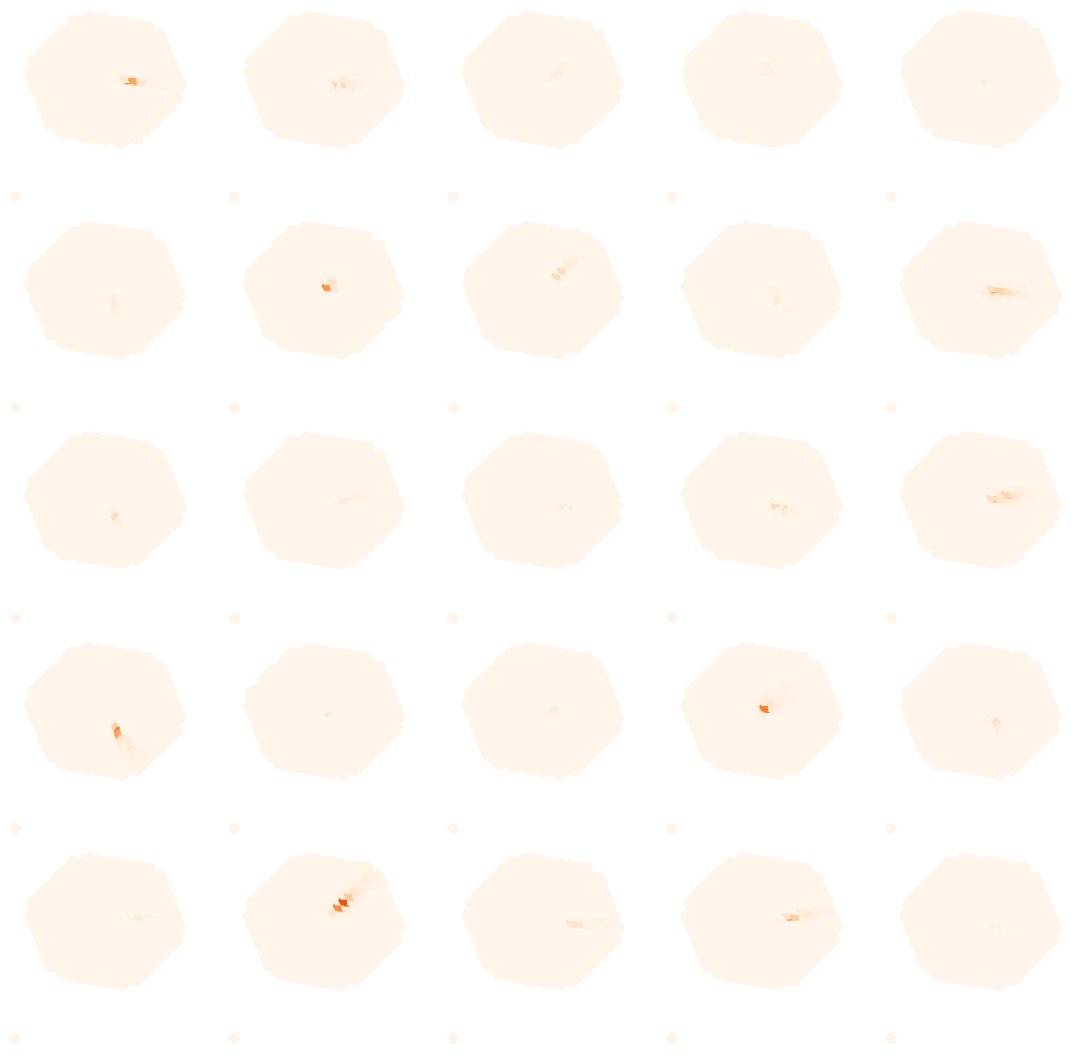

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.scatter(final_array[i][:,0],final_array[i][:,1],s=125,c=final_array[i][:,2],marker="H",vmin=0, vmax=1,cmap="Oranges",alpha=1,edgecolors='None')#cmap="Greys", s=125
  plt.tight_layout()
  plt.axis(False)

In [ ]:
final_array[1][:,1]

array([ 84.,  82.,  83., ..., 117., 116., 114.])

In [ ]:
plt.style.use("seaborn")

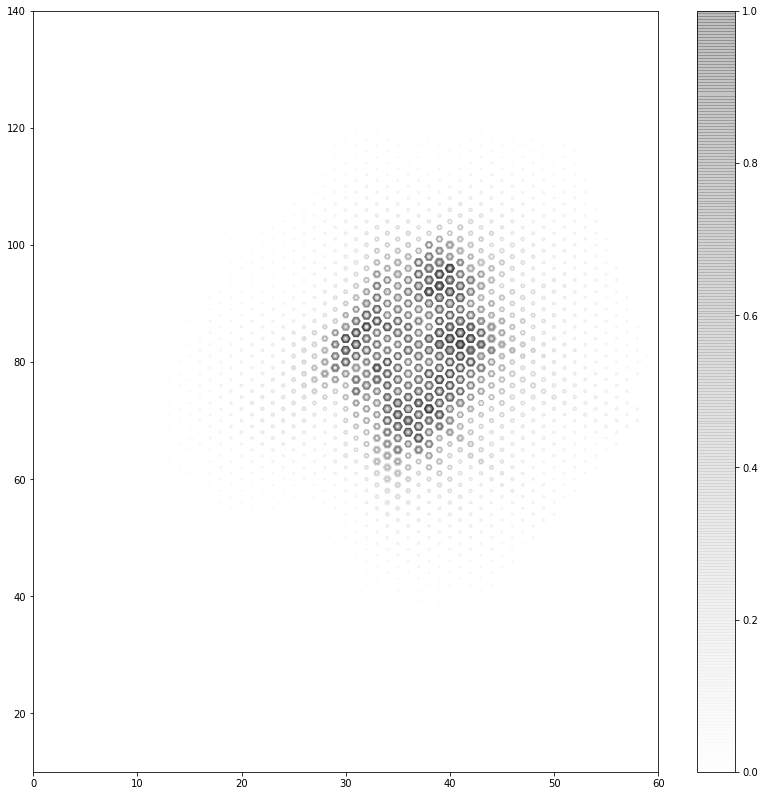

In [ ]:
#voy a representar tods a la vez asi tenemos una idea de donde hay mas incidencia etc...

plt.figure(figsize=(14,14))
plt.xlim([0,60])
plt.ylim([10,140])
for i in range(final_array.shape[0]):#round(final_array.size/100)):
  plt.scatter(final_array[i][:,0],final_array[i][:,1],s=125*final_array[i][:,2],c=final_array[i][:,2],marker="H",vmin=0, vmax=1,cmap="binary",alpha=0.25,edgecolors='None')#cmap="Greys", s=125
plt.colorbar()


In [ ]:
#ahora quiero hacer un hisotgrama para aquellos valores que sean mayores que algun valor, como podría ser la media
total_ints=[i[:,2] for i in final_array]
total_ints=np.array(total_ints).flatten()
media_ints=total_ints.mean()
perc85=np.percentile(total_ints,85)
perc99=np.percentile(total_ints,99)

In [ ]:
print(perc99,perc85,media_ints)

0.03836206896551724 0.0020997060411542382 0.0025697508612718143


In [ ]:

#ahora para los diferentes valores en forma horizontal, hacemos el histograma
hist_x=[]
hist_y=[]
for i in range(final_array.shape[0]):
  aux=final_array[i][:,2]>=perc99
  hist_x.append(final_array[i][aux,0])
  hist_x.append(final_array[i][aux,1])
#plt.hist(hist_x)

In [ ]:
final_array[1].size

5565

In [ ]:
#vamos a hacer lo del histograma de otra forma
pix_x=final_array[:,:,0].flatten()
pix_y=final_array[:,:,1].flatten()
valores_x_pix=np.sort(np.unique(pix_x))[1:]
valores_y_pix=np.sort(np.unique(pix_y))[1:] #quitamos el primero que es 0

intensidades_xy=final_array[:,:,2].flatten()

array([25., 26., 25., ...,  5.,  8.,  7.])

In [ ]:
pix_x_validos=pix_x[intensidades_xy>=perc99]
pix_y_validos=pix_y[intensidades_xy>=perc99]

In [ ]:
#AL USAR IMSHOW O SCATER2d TENEMOS UNA DIFERENTE DISPOSICION DE LOS PIXELES

5.0

(array([[0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 7.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.200e+01, 3.800e+01, 3.400e+01, 2.200e+01,
         1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.000e+00, 1.800e+01, 8.700e+01, 1.250e+02, 9.000e+01,
         1.800e+01, 3.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 2.800e+01, 1.670e+02, 3.560e+02, 5.220e+02,
         1.500e+02, 4.600e+01, 2.000e+01, 4.000e+00],
        [4.000e+00, 2.100e+01, 2.030e+02, 8.130e+02, 2.584e+03, 4.114e+03,
         1.984e+03, 4.130e+02, 9.800e+01, 2.000e+01],
        [2.500e+01, 9.200e+01, 5.660e+02, 2.673e+03, 6.766e+03, 8.279e+03,
         5.910e+03, 1.523e+03, 2.570e+02, 1.700e+01],
        [1.200e+01, 1.450e+02, 5.960e+02, 2.197e+03, 5.551e+03, 8.517e+03,
         5.115e+03, 1.619e+03, 3.150e+02, 1.500e+01],
        [1.000e+01, 7.100e+01, 2.550e+02, 9.080e+02, 2.033e+03, 3.051e+03,
         1.957e+03, 7.

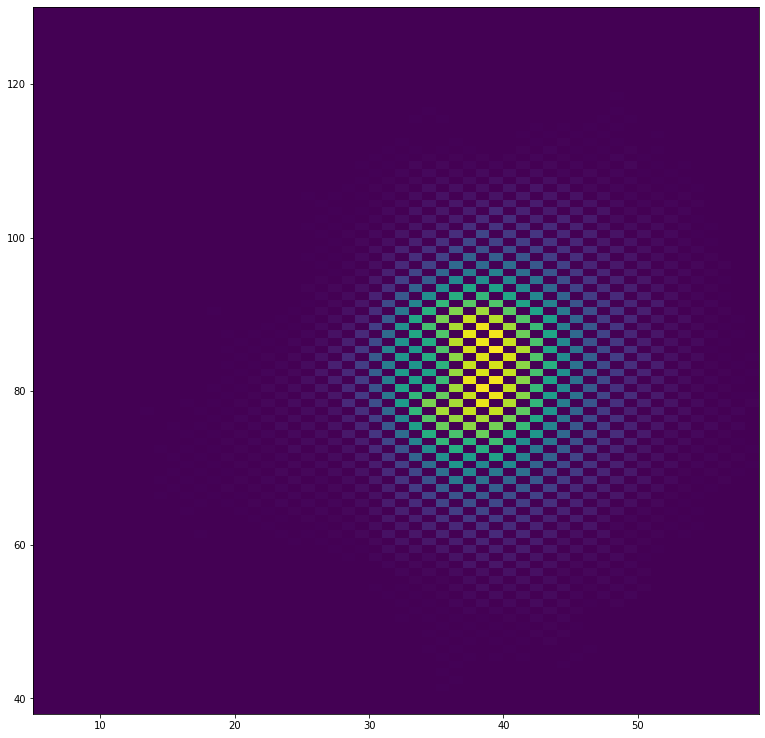

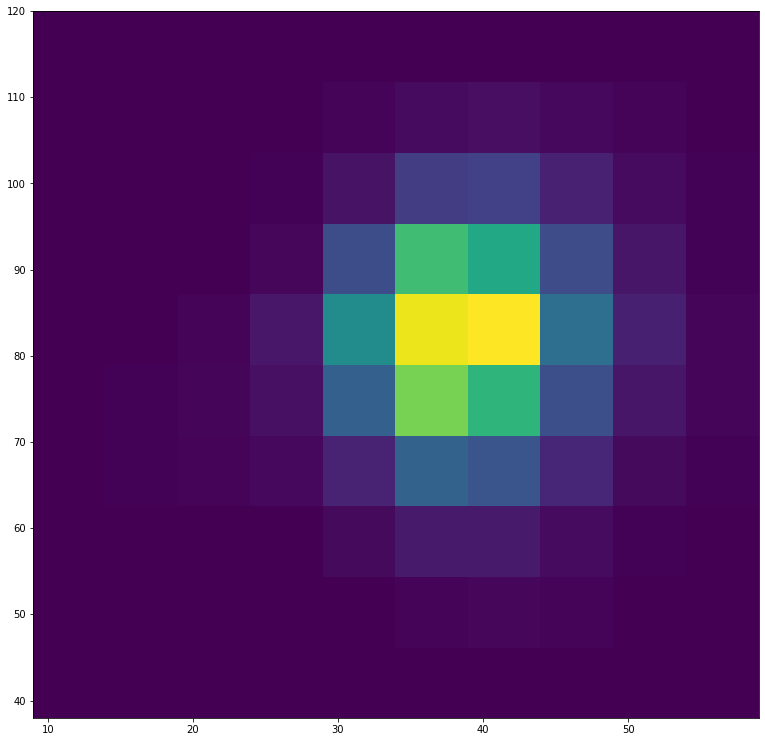

In [ ]:
plt.figure(figsize=(13,13))
plt.hist2d(pix_x_validos,pix_y_validos,bins=[valores_x_pix,valores_y_pix])
plt.figure(figsize=(13,13))
plt.hist2d(pix_x_validos,pix_y_validos,bins=[10,10])

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59.]


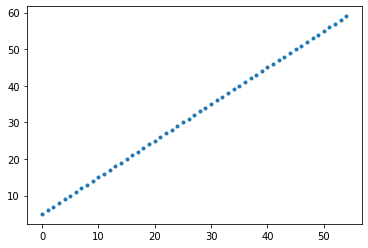

In [ ]:
plt.plot(np.sort(np.unique(pix_x_validos)),".")
print(np.sort(np.unique(pix_x_validos)))

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.000e+00, 1.500e+01,
        0.000e+00, 2.000e+01, 2.600e+01, 2.600e+01, 3.100e+01, 4.600e+01,
        5.600e+01, 0.000e+00, 6.200e+01, 7.700e+01, 1.010e+02, 1.250e+02,
        1.660e+02, 0.000e+00, 2.140e+02, 3.090e+02, 4.790e+02, 7.260e+02,
        1.206e+03, 1.999e+03, 0.000e+00, 2.849e+03, 3.474e+03, 4.090e+03,
        4.788e+03, 5.465e+03, 0.000e+00, 5.836e+03, 5.929e+03, 5.891e+03,
        5.453e+03, 4.923e+03, 4.257e+03, 0.000e+00, 3.558e+03, 2.878e+03,
        2.262e+03, 1.774e+03, 1.339e+03, 0.000e+00, 1.051e+03, 7.880e+02,
        5.800e+02, 4.330e+02, 2.940e+02, 2.190e+02, 0.000e+00, 1.530e+02,
        9.400e+01, 6.100e+01, 3.700e+01, 1.500e+01, 2.000e+00]),
 array([ 9.        ,  9.84745763, 10.69491525, 11.54237288, 12.38983051,
        13.23728814, 14.08474576, 14.93220339, 15.77966102, 16.62711864,
        17.47457627, 18.3220339 , 19.16949153, 20.01694915, 20.86440678,
        21.71186441, 22.55932203, 23.40677966, 24.

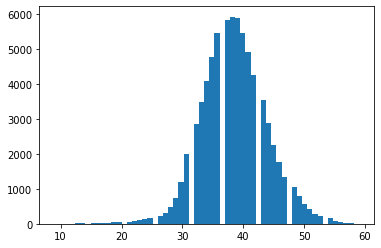

In [ ]:
plt.hist(pix_x_validos,bins=int(max(pix_x)-min(pix_x)))

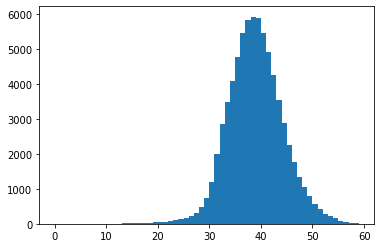

In [ ]:
plt.hist(pix_x_validos,bins=np.sort(np.unique(pix_x)));

In [ ]:
print(valores_x_pix,'\n',valores_y_pix)
#con esto vamos a seleccionar solo los pixeles que nos interesan y descartar los del 0

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59.] 
 [ 38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130.]


In [ ]:
"""
NADA
#tambien voy a intentar hacer un mapa de calor sumand todas las contribuciones e ncada celda, y luego ya ponemos el maximo mas alto
intensidades_total=np.zeros([valores_x_pix,valores_y_pix])

for i in range(final_array.shape[0]):
  intensidades_aux=np.zeros(final_array.shape[1])
  for j in range(final_array.shape[1]):
    if final_array[i][j,2] > media_ints:
      intensidades_total[j]+=final_array[i][j,2]
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)
"""

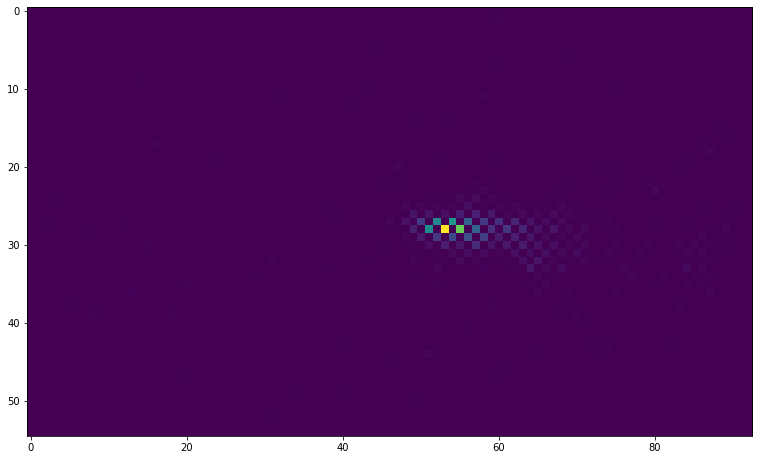

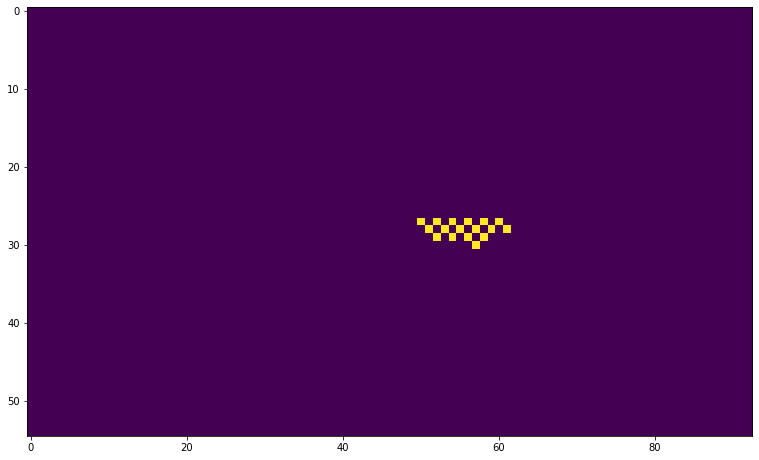

In [ ]:
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])
n=35
a=final_array[n]
for i in a:
  if i[2]>media_ints:
    intensidades_total[int(i[0]-5),int(i[1]-38)]=i[2]
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

a=final_array[n]
for i in a:
  if i[2]>perc99:
    intensidades_total[int(i[0]-5),int(i[1]-38)]=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)


#UNA BUENA ESTRATEGIA ES HACER 1 LOS PIXELES QUE CUMPLEN CON EL UMBRAL Y CERO EL RESTO, ESO VA A HACER QUE EL RUIDO NO PUEDA APORTA EN LARGO TERMINO AL SUMARLO

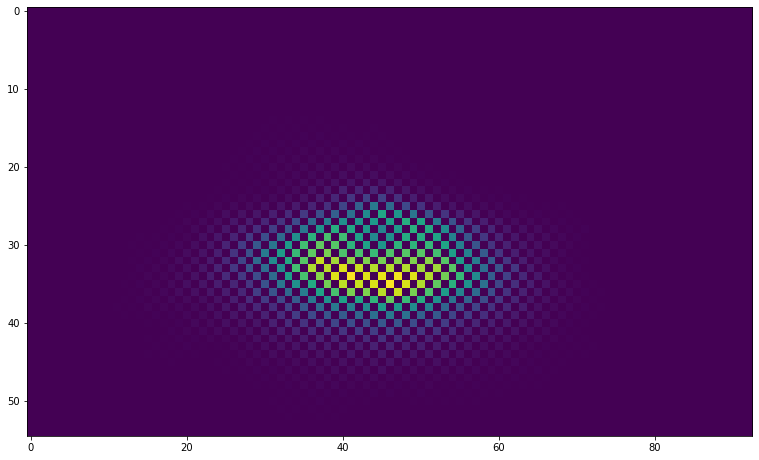

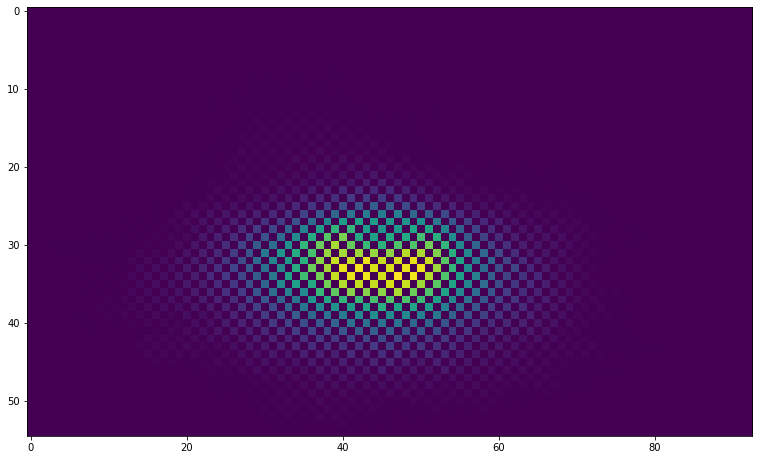

In [ ]:
#vamos a intentar esto ultimo, crear un mapa concontribucion solo de aquellos que superan el umbral.
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > perc99:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=j[2]
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > perc99:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

In [ ]:
#AL USAR IMSHOW O SCATER2d TENEMOS UNA DIFERENTE DISPOSICION DE LOS PIXELES

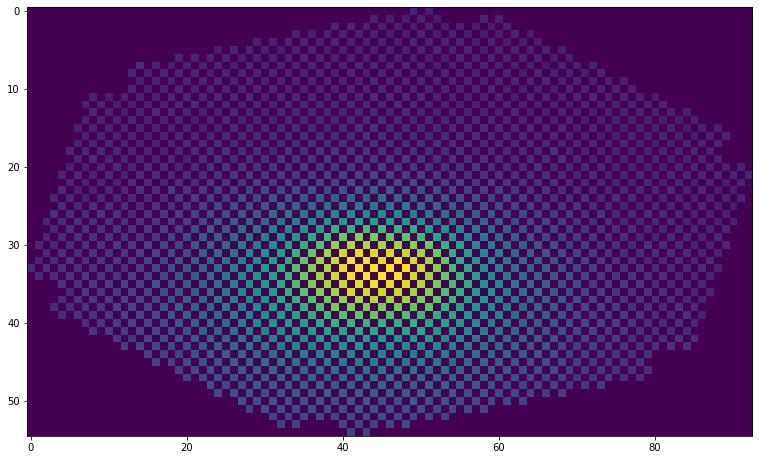

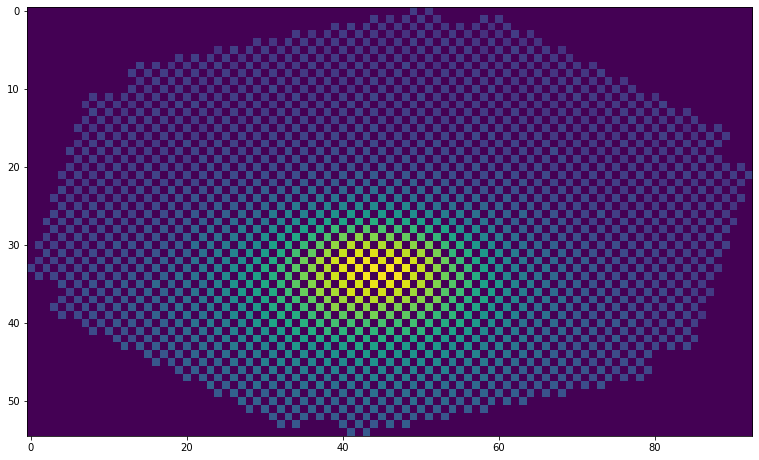

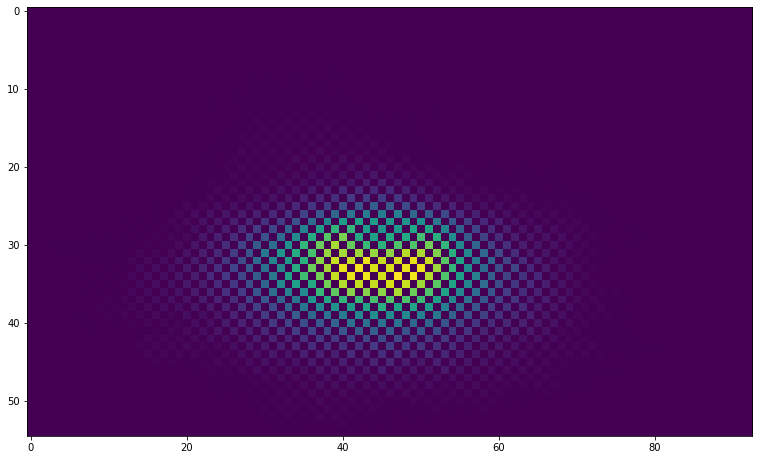

In [ ]:
# voy a intentar hacer un mapa de calor sumand todas las contribuciones e ncada celda, y luego ya ponemos el maximo mas alto
#para umbral media
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > media_ints:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

#para humbral percentil 85
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > perc85:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

#percentil 99
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > perc99:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

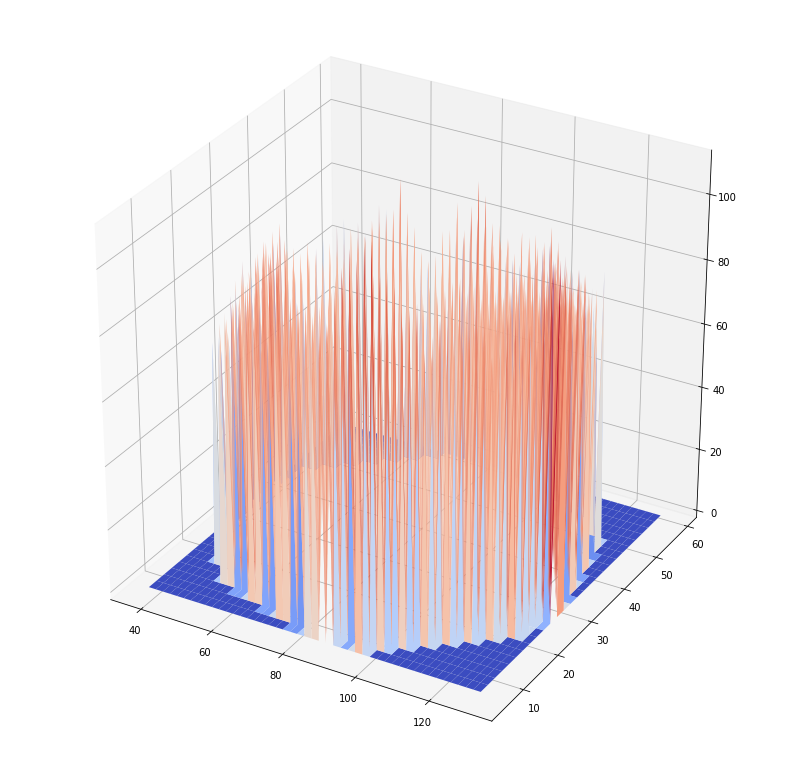

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
XX,YY=np.meshgrid(valores_y_pix,valores_x_pix)
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, intensidades_total, cmap=cm.coolwarm)

In [ ]:
print(valores_x_pix,valores_y_pix)

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59.] [ 38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130.]


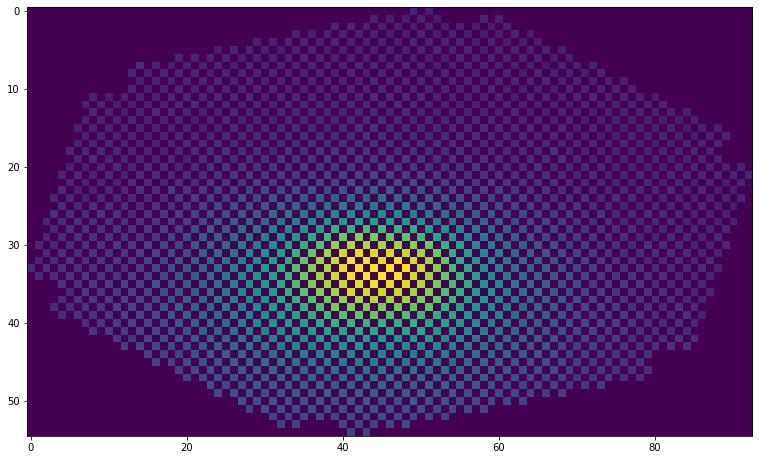

In [ ]:
intensidades_total=np.zeros([valores_x_pix.size,valores_y_pix.size])

for i in final_array:
  for j in i:
    if j[2] > media_ints:
      intensidades_total[int(j[0]-5),int(j[1]-38)]+=1
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

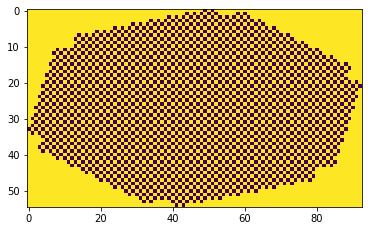

In [ ]:
intensidades_nula=np.zeros([valores_x_pix.size,valores_y_pix.size])
intensidades_nula[np.where(intensidades_total==0)]=1
plt.imshow(intensidades_nula)

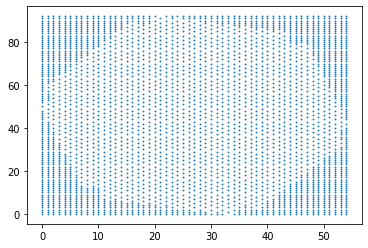

In [ ]:
np.where(intensidades_total==0)
plt.scatter(np.where(intensidades_total==0)[0],np.where(intensidades_total==0)[1],marker="H",s=1)
#en todos esos puntos vamos a hacer la media

In [ ]:
a=np.where(intensidades_total==0)
c=np.dstack([a[0],a[1]])
c=np.squeeze(c) #esta funcion esta para reducir dimensiones para esos casos que se te queda [[[1,23,4],[1,2,54]]], aqui nos sobra una
for i,j in c:

  if (i!= int(valores_x_pix[0]-5)) and (i!= int(valores_x_pix[-1]-5)) and (j!= int(valores_y_pix[0]-38)) and (j!= int(valores_y_pix[-1]-38)):
    val_medio_aux=(intensidades_total[i-1,j]+intensidades_total[i+1,j]+intensidades_total[i,j-1]+intensidades_total[i,j+1])/4
    intensidades_total[i,j]=val_medio_aux

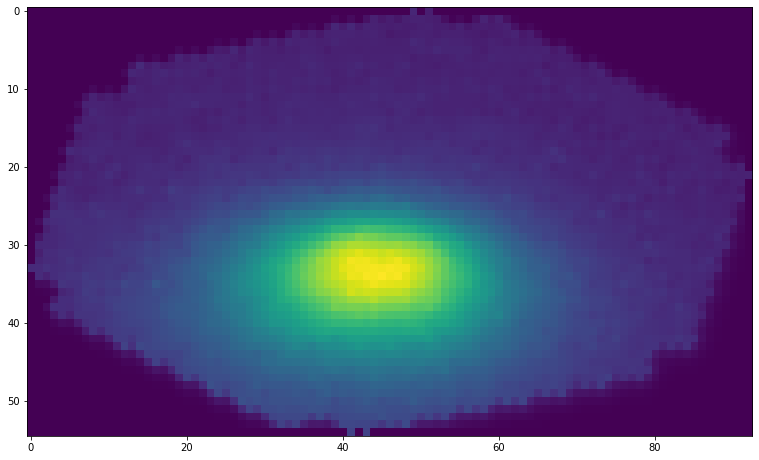

In [ ]:
plt.figure(figsize=(13,13))
plt.imshow(intensidades_total)

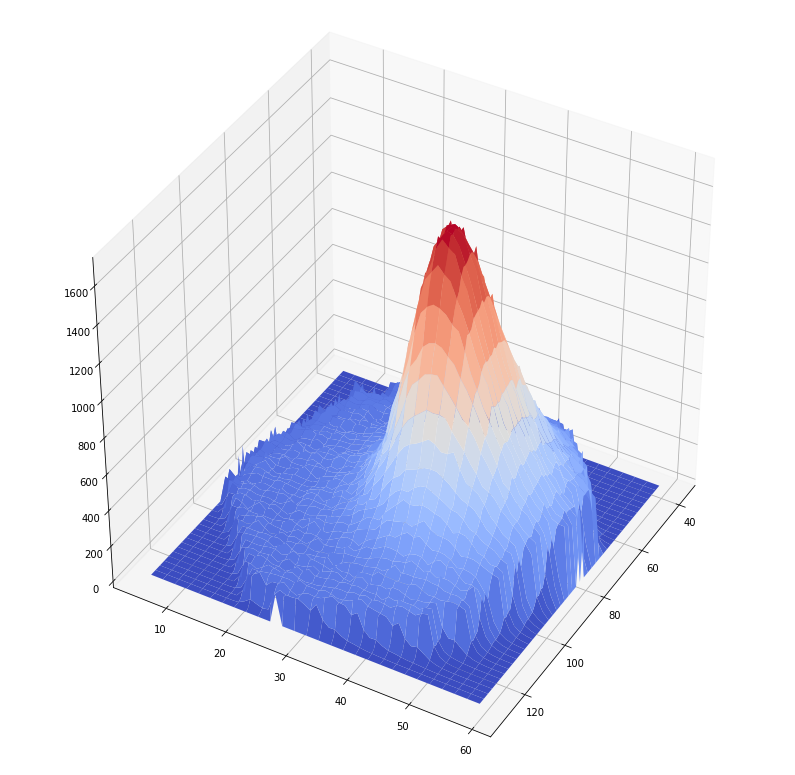

In [ ]:
#ahora si lo podemos representar en 3D bien
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
XX,YY=np.meshgrid(valores_y_pix,valores_x_pix)
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, intensidades_total, cmap=cm.coolwarm)
ax.view_init(elev=40,azim=30)

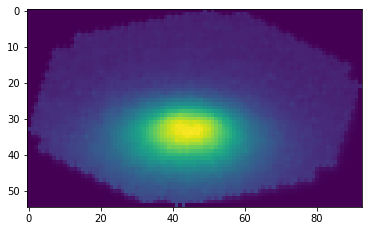

In [ ]:
plt.imshow(intensidades_total)

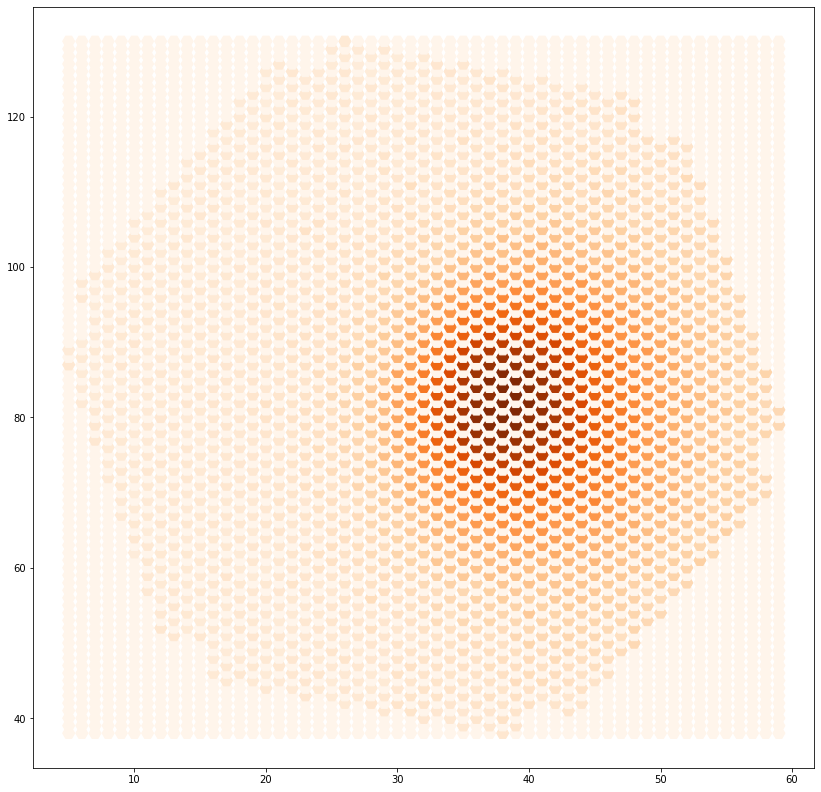

In [ ]:
#no se como escribirlo de esta manera JODER
plt.figure(figsize=(14,14))
XX,YY=np.meshgrid(valores_x_pix,valores_y_pix)
plt.scatter(XX.flatten(),YY.flatten(),s=145,c=intensidades_total.transpose().flatten(),marker="H",cmap="Oranges",alpha=1)

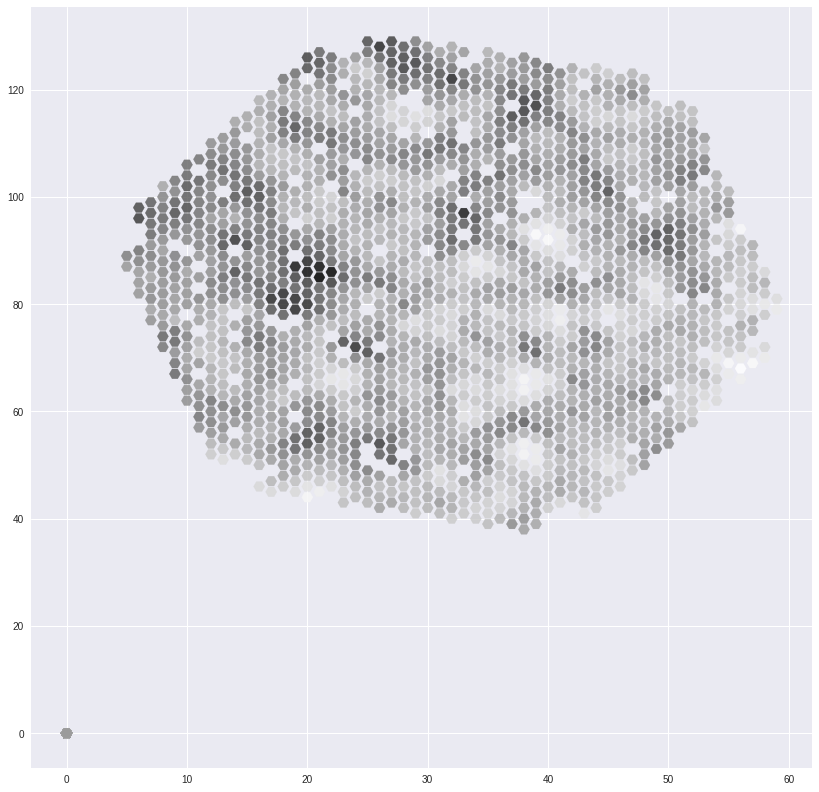

In [ ]:
plt.figure(figsize=(14,14))
plt.scatter(final_array[40][:,0],final_array[40][:,1],s=125,c=intensidades_total,marker="H",cmap="binary",alpha=0.85)

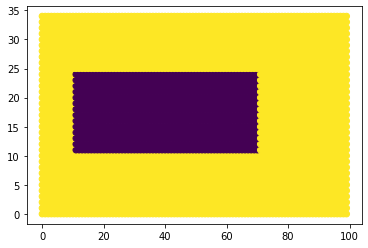

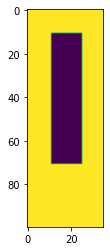

In [ ]:
x=np.arange(100)
y=np.arange(35)
XX,YY=np.meshgrid(x,y)
mat=np.ones([100,35])
for i in range(100):
  for j in range(35):
    if (i<=70 and i>10):
      if (j>10 and j<25):
        mat[i,j]=0
plt.scatter(XX.flatten(),YY.flatten(),c=mat.transpose().flatten())

plt.figure()
plt.imshow(mat)


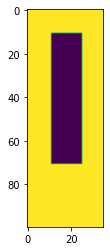

In [ ]:
#DE LO ULTIMO ADEMAS VEMOS QUE ESTA ROTADO, ESO QUE VEMOS EN LAS PRIMERAS IMAGENES,
#AL USAR IMSHOW O SCATER2d TENEMOS UNA DIFERENTE DISPOSICION DE LOS PIXELES